# Perceptron Algorithm
The Perceptron is a linear machine learning algorithm for binary classification tasks.

It may be considered one of the first and one of the simplest types of artificial neural networks. It is definitely not “deep” learning but is an important building block.

Perceptron algoritm is gnerally used with linearly seperable data, but it can be used with non-linearly seperable data as well when we are okay with some error while training, but in case of non-linearly seperable data, the classical algorithm will not terminate hence we will have to use some huristics to stop the algorithm.

# Learning Non-Linear decision boundary
Learning non-linear decision boundary is not different from learning linear decision boundary. We only need to augument non linear polynomials based on the already existing features. The algorithm will be able to separate the data into two classes only if a curve of that particular degree can separate the data into two classes.

Here as we had two features and we needed to separate circular data, we agumented $x_1^2$ and $x_2^2$ and $x_1x_2$ to get a non-linear decision boundary. This agumented feature space will be able to create circular as well as elliptical decision boundaries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

## Generating Synthetic Data
We are using some libraries to generate synthetic data. This will help us generate some data that is linearly seperable and as we want it to be.

We have tried multiple data sets by changing random_state parameter  and settled with the one which is just linearly seperable. This is so that we can really see the effect of the algorithm as it learns the parameters.

By default the classes are 0 and 1, we have changed the classes to -1 and 1 to make it directly suitable for Perceptron. We will also agument the data with a bias term, as the separator need not pass from origin.

In [2]:
X, y = datasets.make_circles(n_samples=100, shuffle=True, noise=0.04, random_state=100, factor=0.8)

In [3]:
print(np.unique(y))


[0 1]


In [4]:
y[y == 0] = -1

### Visualizing the Data
We have plotted the data to conform its linear seperability. As there are only two features, it is easy to manually identify linear seperability. Also as we previously mentioned, the data is just linearly seperable instead of completly separate clusters.

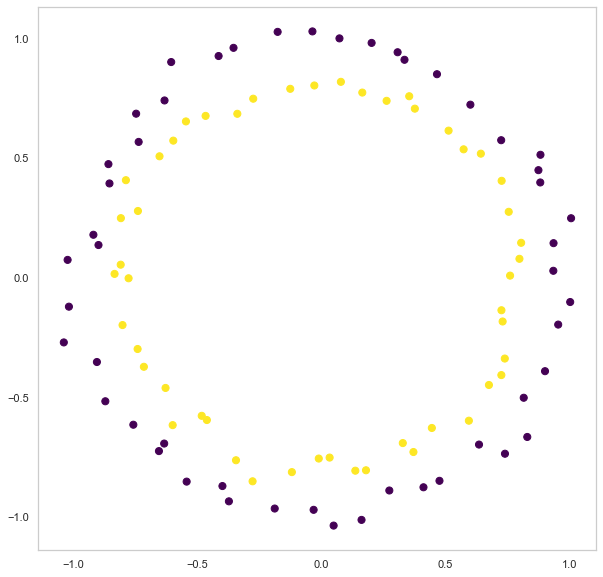

In [5]:
# Plot the data
sns.set()
sns.set_style("whitegrid")
# set figure size
plt.figure(figsize=(10, 10))
# turn grid off
plt.grid(False)
# turn scale off
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()


In [6]:
# augument 1, X[0]^2 X[1]^2 
X_aug = np.c_[np.ones(len(X)), X, X[:, 0] ** 2, X[:, 1] ** 2, X[:, 0] * X[:, 1]]

In [7]:
print(X_aug[:10])

[[ 1.00000000e+00 -3.11636534e-02 -9.70826653e-01  9.71173294e-04
   9.42504390e-01  3.02545053e-02]
 [ 1.00000000e+00  7.88966484e-02  8.17529577e-01  6.22468113e-03
   6.68354609e-01  6.45003436e-02]
 [ 1.00000000e+00 -1.01876430e+00 -1.21954030e-01  1.03788070e+00
   1.48727855e-02  1.24242412e-01]
 [ 1.00000000e+00  4.12228872e-01 -8.76590205e-01  1.69932643e-01
   7.68410388e-01 -3.61355791e-01]
 [ 1.00000000e+00 -3.73087450e-01 -9.35326594e-01  1.39194246e-01
   8.74835837e-01  3.48958614e-01]
 [ 1.00000000e+00 -1.02406631e+00  7.35191007e-02  1.04871180e+00
   5.40505816e-03 -7.52884339e-02]
 [ 1.00000000e+00 -1.88179010e-01 -9.65437315e-01  3.54113396e-02
   9.32069209e-01  1.81675038e-01]
 [ 1.00000000e+00 -5.43639171e-01 -8.52978821e-01  2.95543549e-01
   7.27572869e-01  4.63712699e-01]
 [ 1.00000000e+00 -8.02396644e-01 -1.98762580e-01  6.43840374e-01
   3.95065630e-02  1.59486427e-01]
 [ 1.00000000e+00 -8.59319072e-01  4.73717566e-01  7.38429268e-01
   2.24408333e-01 -4.0707

## The Perceptron Algorithm
Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

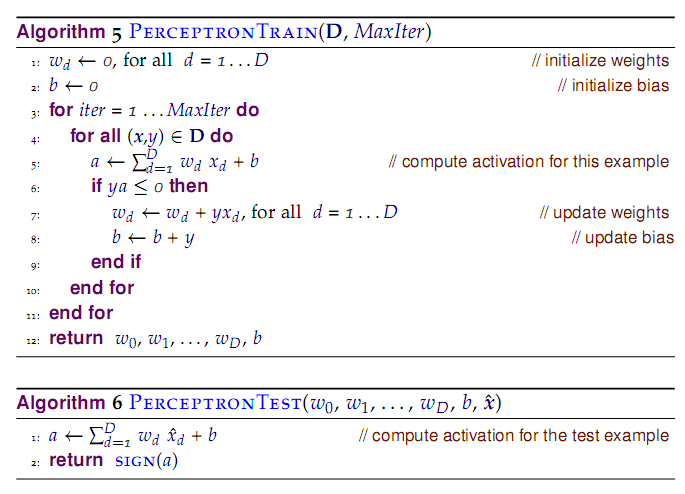

The algorithm is shown in the above image.

In [8]:
def perceptron(X, y, w_init=None, eta=0.1, epochs=1000):
    """
    Perceptron learning algorithm.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target vector relative to X.
    eta : float
        Learning rate (between 0.0 and 1.0)
    epochs : int
        Passes over the training dataset.

    Returns
    -------
    w : array-like, shape = [n_features + 1]
        Weights after fitting.
    errors : list
        Number of misclassifications in every epoch.

    """
    print("eta :", eta)
    if w_init is None:
        w = np.zeros(X.shape[1])
    else:
        w = w_init

    errors = []
    weights = []
    for epoch in range(epochs):
        e = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * y[i]) <= 0:
                w = w + eta * X[i] * y[i]
                e += 1
        errors.append(e)
        weights.append(w)
        if epoch % 10 == 0:
            print("epoch: ", epoch, "error: ", e)
        if e == 0:
            break
    print("epoch: ", epoch, "error: ", e)
    return weights, errors

In [9]:
weights, errors = perceptron(X_aug, y, w_init=[-1,-1,-1,-1, -1, 0], eta=0.1, epochs=5000)

eta : 0.1
epoch:  0 error:  36
epoch:  10 error:  9
epoch:  14 error:  0


## Visualizing the learning
We will now plot the decision boundary learnt during each epoch. This will give is a good idea of how the parameters are being learnt. This thing can be done even after learning each data point but that would create too many plots and so we have not done that here.

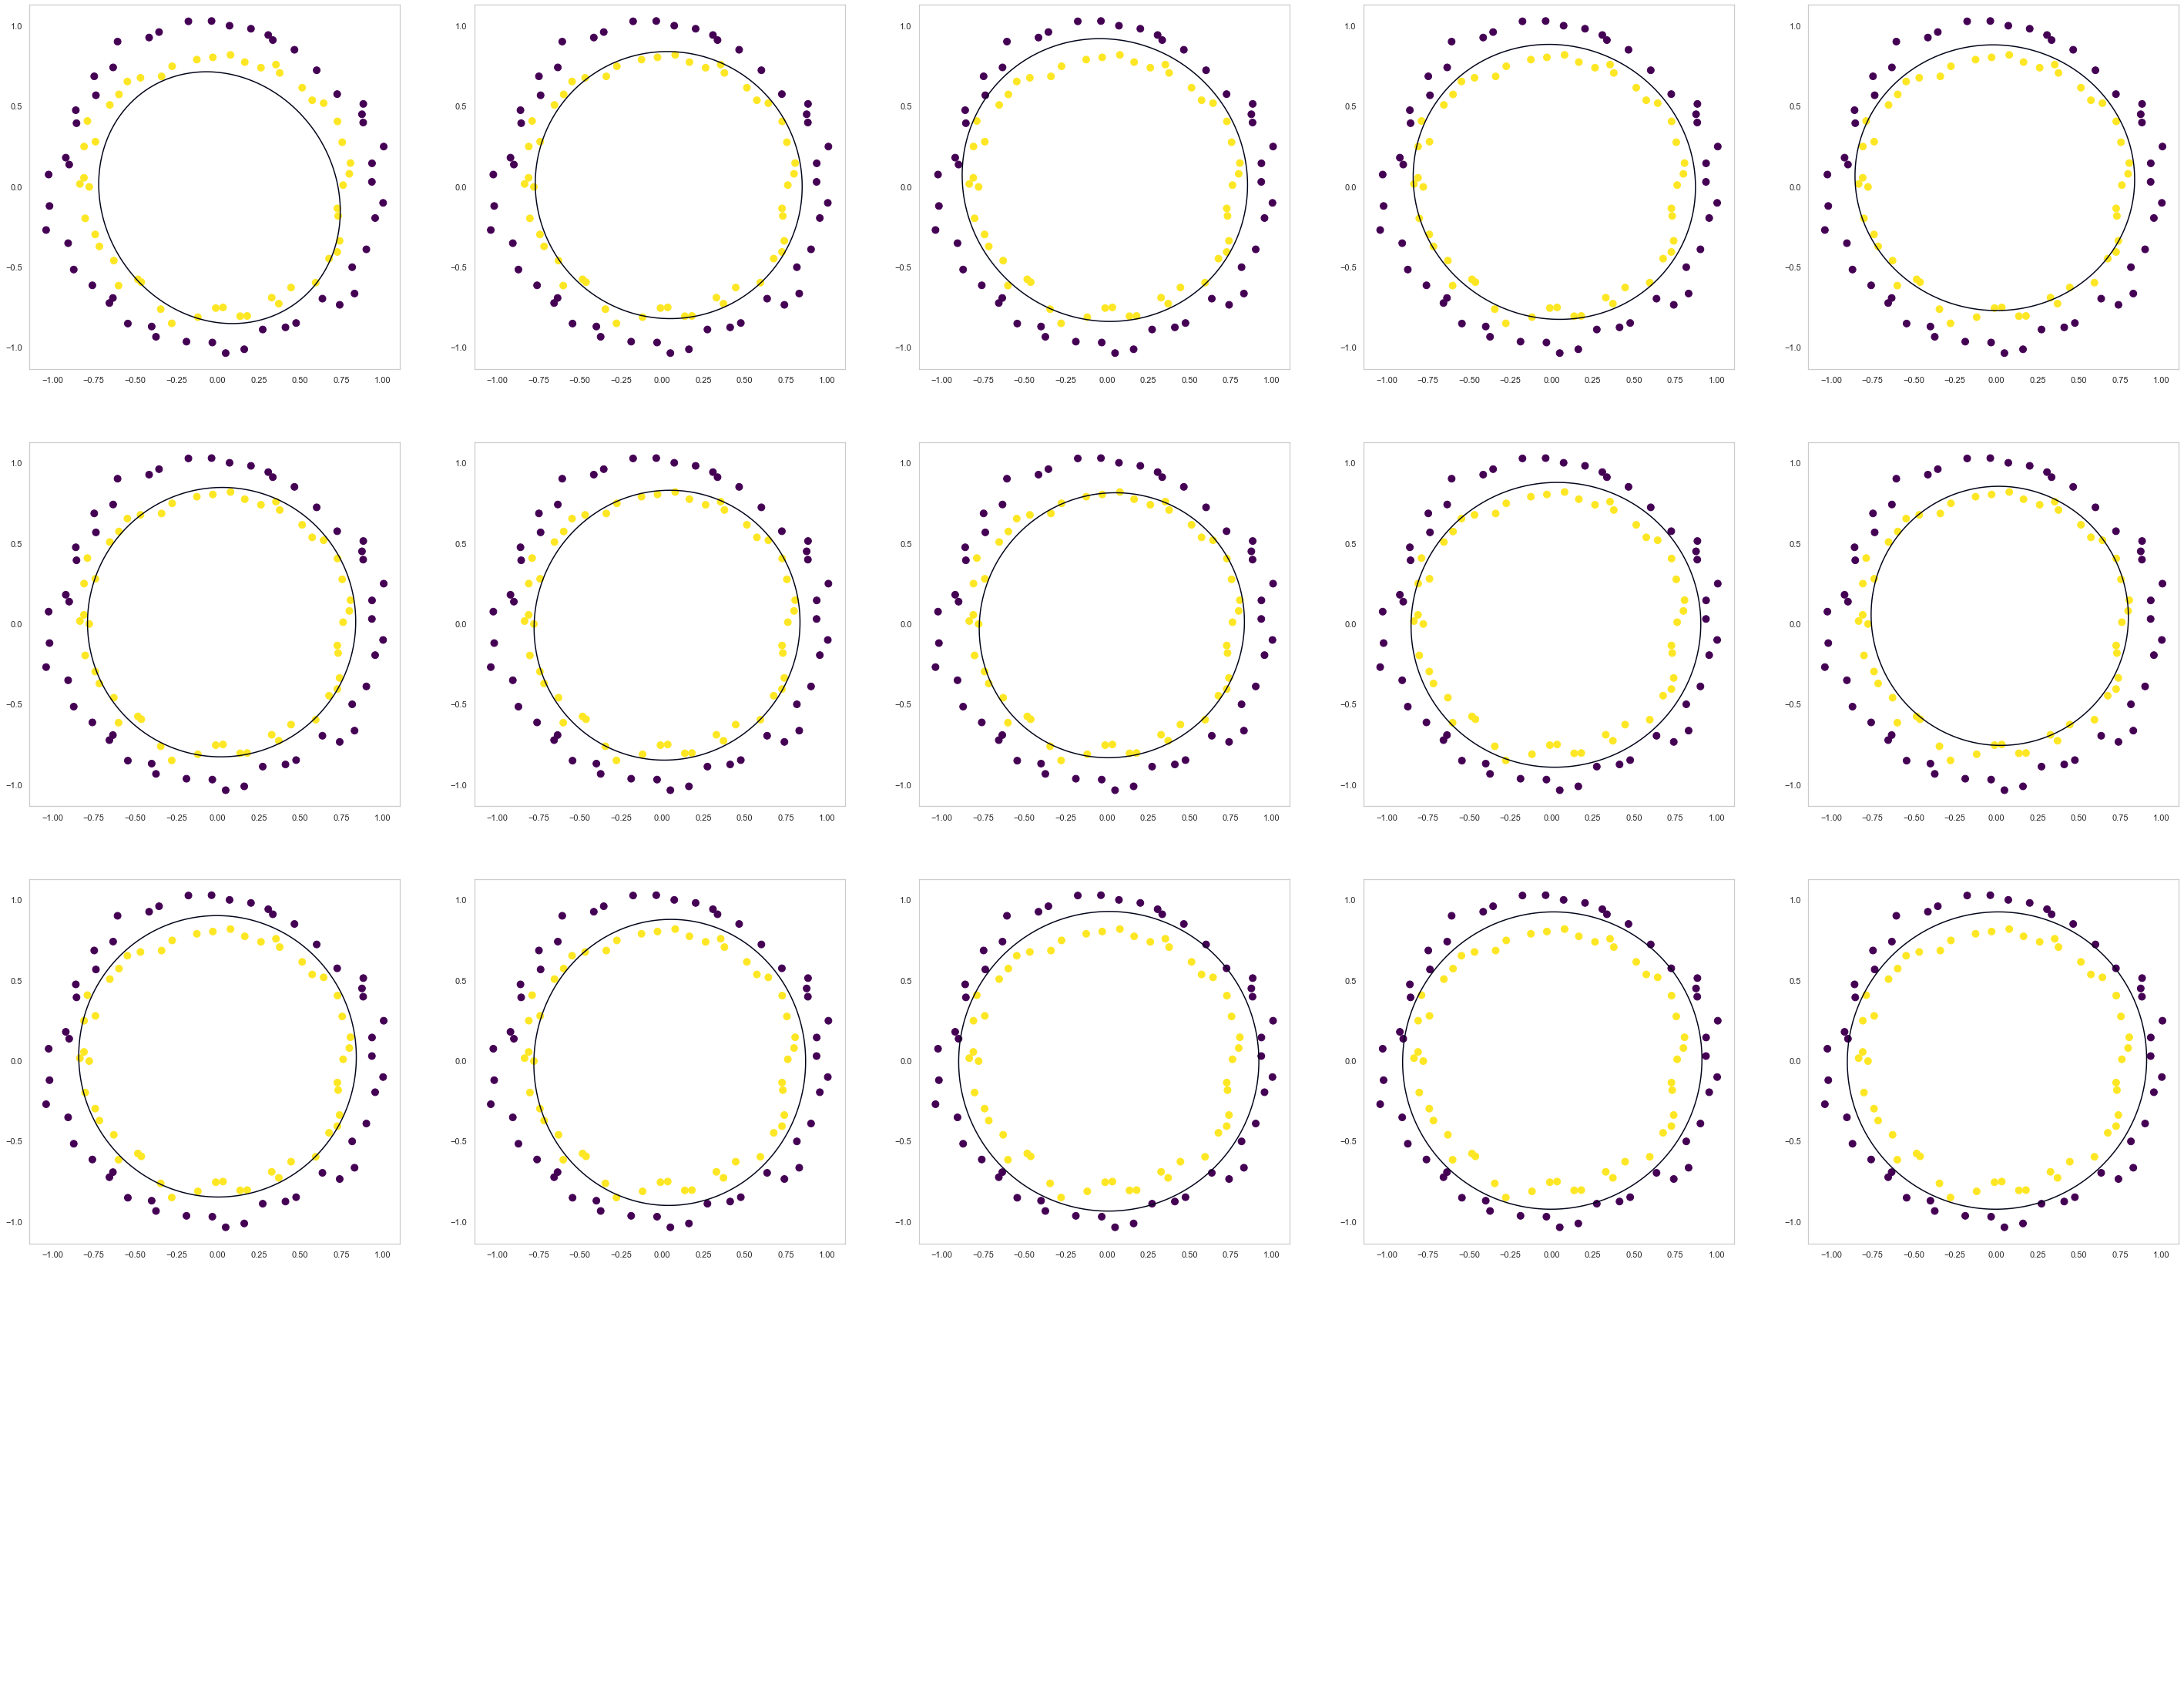

In [10]:
# using the weights to plot the decision boundary
Xs = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
Ys = np.linspace(X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1, 100)
Xs, Ys = np.meshgrid(Xs, Ys)
if (len(weights) <= 50):
    columns = 5
    rows = len(weights) // columns + 1
    fig, ax = plt.subplots(rows, columns, figsize=(50, 50*rows/columns))
    for i in range(len(weights)):
        w = weights[i]
        Zs = (-w[0] - w[1] * Xs - w[2] * Ys - w[3] * Xs ** 2 - w[4] * Ys ** 2 - w[5] * Xs * Ys)
        ax[i//columns, i%columns].contour(Xs, Ys, Zs, levels=[0])
        # plt the data
        ax[i//columns, i%columns].scatter(X[:, 0], X[:, 1], c=y, s=80, cmap='viridis')
        # turn grid off
        ax[i//columns, i%columns].grid(False)
    

    # remove the empty subplots
    for i in range(rows):
        for j in range(columns):
            if ax[i, j].has_data() == False:
                ax[i, j].axis('off')



## Visualisation (Max Pro Ultra :)
Looking at curves of loss and the decision boundary not only helps us understand that algorithm is working properly but also give us the feel of the working of the algorithm. So we have moved out of the way to create a Gif of the learning process. 

We have created multiple images which are the instances after each epoch and also plotted the loss plot till that epoch. We have then combined those images to create a gif of the learning process. The gif is basically the animation of the learning process. 

The best part is none of this is static, i.e. changing the data set will automatically learn the new data, generate new images and make a new gif based on it.



In [11]:

# creating each plot and saving it
import os
import shutil
path = os.path.join(os.getcwd(), 'plots-03')
if not os.path.exists(path):
    os.makedirs(path)
# remove the old plots from plot folder
for filename in os.listdir('plots-03'):
    file_path = os.path.join('plots-03', filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))
# save the plots
for i in range(len(weights)):
    w = weights[i]
    fig = plt.figure(figsize=(20, 27))
    Zs = (-w[0] - w[1] * Xs - w[2] * Ys - w[3] * Xs ** 2 - w[4] * Ys ** 2 - w[5] * Xs * Ys)
    ax0 = plt.subplot2grid((4, 1), (0, 0), rowspan=3, colspan=2)
    ax0.contour(Xs, Ys, Zs, levels=[0], colors='b')
    # plt the data
    ax0.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='viridis')
    # turn grid off
    ax0.grid(False)
    ax0.text(0.1, 0.1, str(i), fontsize=50, horizontalalignment='center', verticalalignment='center', transform=ax0.transAxes)
    ax0.set_yticklabels([])
    ax0.set_xticklabels([])
 

    ax1 = plt.subplot2grid((4, 1), (3, 0))
    ax1.set_xlim(0, len(errors))
    ax1.set_ylim(0, max(errors))
    ax1.plot(errors[:i+1])
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('error')
    ax1.grid(False)
    ax1.axis('off')
    ax1.text(0.2, 0.1, 'loss: %.2f' % errors[i], fontsize=20,
             horizontalalignment='center', verticalalignment='center',
             transform=ax1.transAxes)
   


    filename = os.path.join(path, str(i) + '.png')
    plt.savefig(filename)
    plt.savefig(filename, dpi=100)
    # clear the plot
    plt.clf()
    plt.close()
    


In [12]:
# delete the old perceptron.gif
for filename in os.listdir('.'):
    if filename == 'secondOrder.gif':
        os.remove(filename)


# create a gif from the plots
import imageio
images = []
filenames = [filename for filename in os.listdir('plots-03')]
# sort the filenames based on the iteration number
filenames.sort(key=lambda x: int(x.split('.')[0]))
for filename in filenames:
    images.append(imageio.imread(os.path.join('plots-03', filename)))


imageio.mimsave('secondOrder.gif', images, duration=0.5)




### The GIF
We have used he HTML library to show the created GIF.

In [13]:
# show the gif
import matplotlib.animation as animation
from IPython.display import HTML


# display the gif

HTML('<img src="{}">'.format('secondOrder.gif'))


### The final decision boundary
The final decision boundary is the one which is learnt after the last epoch. 

Obervations:
- The data is linear separable, so the perceptron is able to learn the decision boundary and separate the data.
- The decision boundary is not very general, infact its passing very close to many of the samples, as perceptron algorithm has no way to learn a general decision boundary which is mid way between two samples because if the loss turning zero as soon as all samples are correctly classified.

Possible Improvements:
- The perceptron algorithm is not very general, it can learn a general decision boundary which is mid way between two samples.
- Few modifications can be made to the algorithm to make it more general.
- Algorithms like SVM can be used to learn a general decision boundary.

